# Warriors Game Data — Exploratory Analysis

This notebook explores the historical dataset (2015-16 to 2024-25) with engineered features, checking distributions, correlations, and season-level summaries.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.max_columns', 120)

DATA_PATH = Path("../data/processed/warriors_historical_2015_16_to_2024_25_processed.csv")
raw_path = Path("../data/raw/warriors_historical_2015_16_to_2024_25.csv")

df = pd.read_csv(DATA_PATH)
raw_df = pd.read_csv(raw_path)

print(f"Rows: {len(df)}, Columns: {len(df.columns)}")
df.head()


Rows: 793, Columns: 85


,Team_ID,Game_ID,GAME_DATE,MATCHUP,WL,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,SEASON,SEASON_TYPE,OPP_PTS,POINT_DIFF,WIN,TSA,TS_PCT,EFG_PCT,AST_TOV_RATIO,OREB_PCT,PTS_ROLLING_5,FG_PCT_ROLLING_5,FG3_PCT_ROLLING_5,FT_PCT_ROLLING_5,REB_ROLLING_5,AST_ROLLING_5,TOV_ROLLING_5,STL_ROLLING_5,BLK_ROLLING_5,PF_ROLLING_5,TS_PCT_ROLLING_5,EFG_PCT_ROLLING_5,AST_TOV_RATIO_ROLLING_5,PTS_ROLLING_10,FG_PCT_ROLLING_10,FG3_PCT_ROLLING_10,FT_PCT_ROLLING_10,REB_ROLLING_10,AST_ROLLING_10,TOV_ROLLING_10,STL_ROLLING_10,BLK_ROLLING_10,PF_ROLLING_10,TS_PCT_ROLLING_10,EFG_PCT_ROLLING_10,AST_TOV_RATIO_ROLLING_10,PTS_ROLLING_20,FG_PCT_ROLLING_20,FG3_PCT_ROLLING_20,FT_PCT_ROLLING_20,REB_ROLLING_20,AST_ROLLING_20,TOV_ROLLING_20,STL_ROLLING_20,BLK_ROLLING_20,PF_ROLLING_20,TS_PCT_ROLLING_20,EFG_PCT_ROLLING_20,AST_TOV_RATIO_ROLLING_20,IS_HOME,REST_DAYS,IS_BACK_TO_BACK,SEASON_PHASE,SEASON_PHASE_EARLY,SEASON_PHASE_MID,SEASON_PHASE_LATE,WIN_STREAK,LOSS_STREAK
0,1610612744,21500003,2015-10-27,GSW vs. NOP,W,1,0,1.0,240,41,96,0.427083,9,30,0.300000,20,22,0.909091,21,35,56,29,8,7,20,29,111,2015-16,Regular Season,95.0,16.0,1,105.68,0.525170,0.473958,1.450000,0.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,1,early,1,0,0,0.0,0.0
1,1610612744,21500030,2015-10-30,GSW @ HOU,W,2,0,1.0,240,43,93,0.462366,9,26,0.346154,17,25,0.680000,11,36,47,26,9,4,8,24,112,2015-16,Regular Season,92.0,20.0,1,104.00,0.538462,0.510753,3.250000,0.234043,111.0,0.427083,0.300000,0.909091,56.0,29.00,20.000000,8.00,7.0,29.000000,0.525170,0.473958,1.450000,111.0,0.427083,0.300000,0.909091,56.0,29.00,20.000000,8.00,7.0,29.000000,0.525170,0.473958,1.450000,111.0,0.427083,0.300000,0.909091,56.0,29.00,20.000000,8.00,7.0,29.000000,0.525170,0.473958,1.450000,0,2.0,0,early,1,0,0,1.0,0.0
2,1610612744,21500035,2015-10-31,GSW @ NOP,W,3,0,1.0,240,46,84,0.547619,17,30,0.566667,25,35,0.714286,3,35,38,26,10,4,10,24,134,2015-16,Regular Season,120.0,14.0,1,99.40,0.674044,0.648810,2.600000,0.078947,111.5,0.444724,0.323077,0.794545,51.5,27.50,14.000000,8.50,5.5,26.500000,0.531816,0.492356,2.350000,111.5,0.444724,0.323077,0.794545,51.5,27.50,14.000000,8.50,5.5,26.500000,0.531816,0.492356,2.350000,111.5,0.444724,0.323077,0.794545,51.5,27.50,14.000000,8.50,5.5,26.500000,0.531816,0.492356,2.350000,0,0.0,1,early,1,0,0,2.0,0.0
3,1610612744,21500051,2015-11-02,GSW vs. MEM,W,4,0,1.0,240,43,84,0.511905,11,25,0.440000,22,30,0.733333,10,55,65,32,8,13,14,15,119,2015-16,Regular Season,69.0,50.0,1,97.20,0.612140,0.577381,2.285714,0.153846,119.0,0.479023,0.404274,0.767792,47.0,27.00,12.666667,9.00,5.0,25.666667,0.579225,0.544507,2.433333,119.0,0.479023,0.404274,0.767792,47.0,27.00,12.666667,9.00,5.0,25.666667,0.579225,0.544507,2.433333,119.0,0.479023,0.404274,0.767792,47.0,27.00,12.666667,9.00,5.0,25.666667,0.579225,0.544507,2.433333,1,1.0,0,early,1,0,0,3.0,0.0
4,1610612744,21500069,2015-11-04,GSW vs. LAC,W,5,0,1.0,240,39,85,0.458824,10,26,0.384615,24,31,0.774194,9,33,42,28,6,5,12,22,112,2015-16,Regular Season,108.0,4.0,1,98.64,0.567721,0.517647,2.333333,0.214286,119.0,0.487243,0.413205,0.759177,51.5,28.25,13.000000,8.75,7.0,23.000000,0.587454,0.552725,2.396429,119.0,0.487243,0.413205,0.759177,51.5,28.25,13.000000,8.75,7.0,23.000000,0.587454,0.552725,2.396429,119.0,0.487243,0.413205,0.759177,51.5,28.25,13.000000,8.75,7.0,23.000000,0.587454,0.552725,2.396429,1,1.0,0,early,1,0,0,4.0,0.0


In [2]:
# Basic summary
summary = {
    "rows": len(df),
    "cols": len(df.columns),
    "seasons": df['SEASON'].nunique() if 'SEASON' in df else None,
    "wins": int((df['WIN'] == 1).sum()),
    "losses": int((df['WIN'] == 0).sum()),
    "win_rate": (df['WIN'] == 1).mean(),
    "point_diff_mean": df['POINT_DIFF'].mean(),
    "point_diff_std": df['POINT_DIFF'].std(),
}
summary


{'rows': 793,
 'cols': 85,
 'seasons': 10,
 'wins': 500,
 'losses': 293,
 'win_rate': 0.6305170239596469,
 'point_diff_mean': 4.524590163934426,
 'point_diff_std': 16.479163860161552}

## Feature Distributions
Analyze distributions of key features to understand data characteristics and identify potential issues.

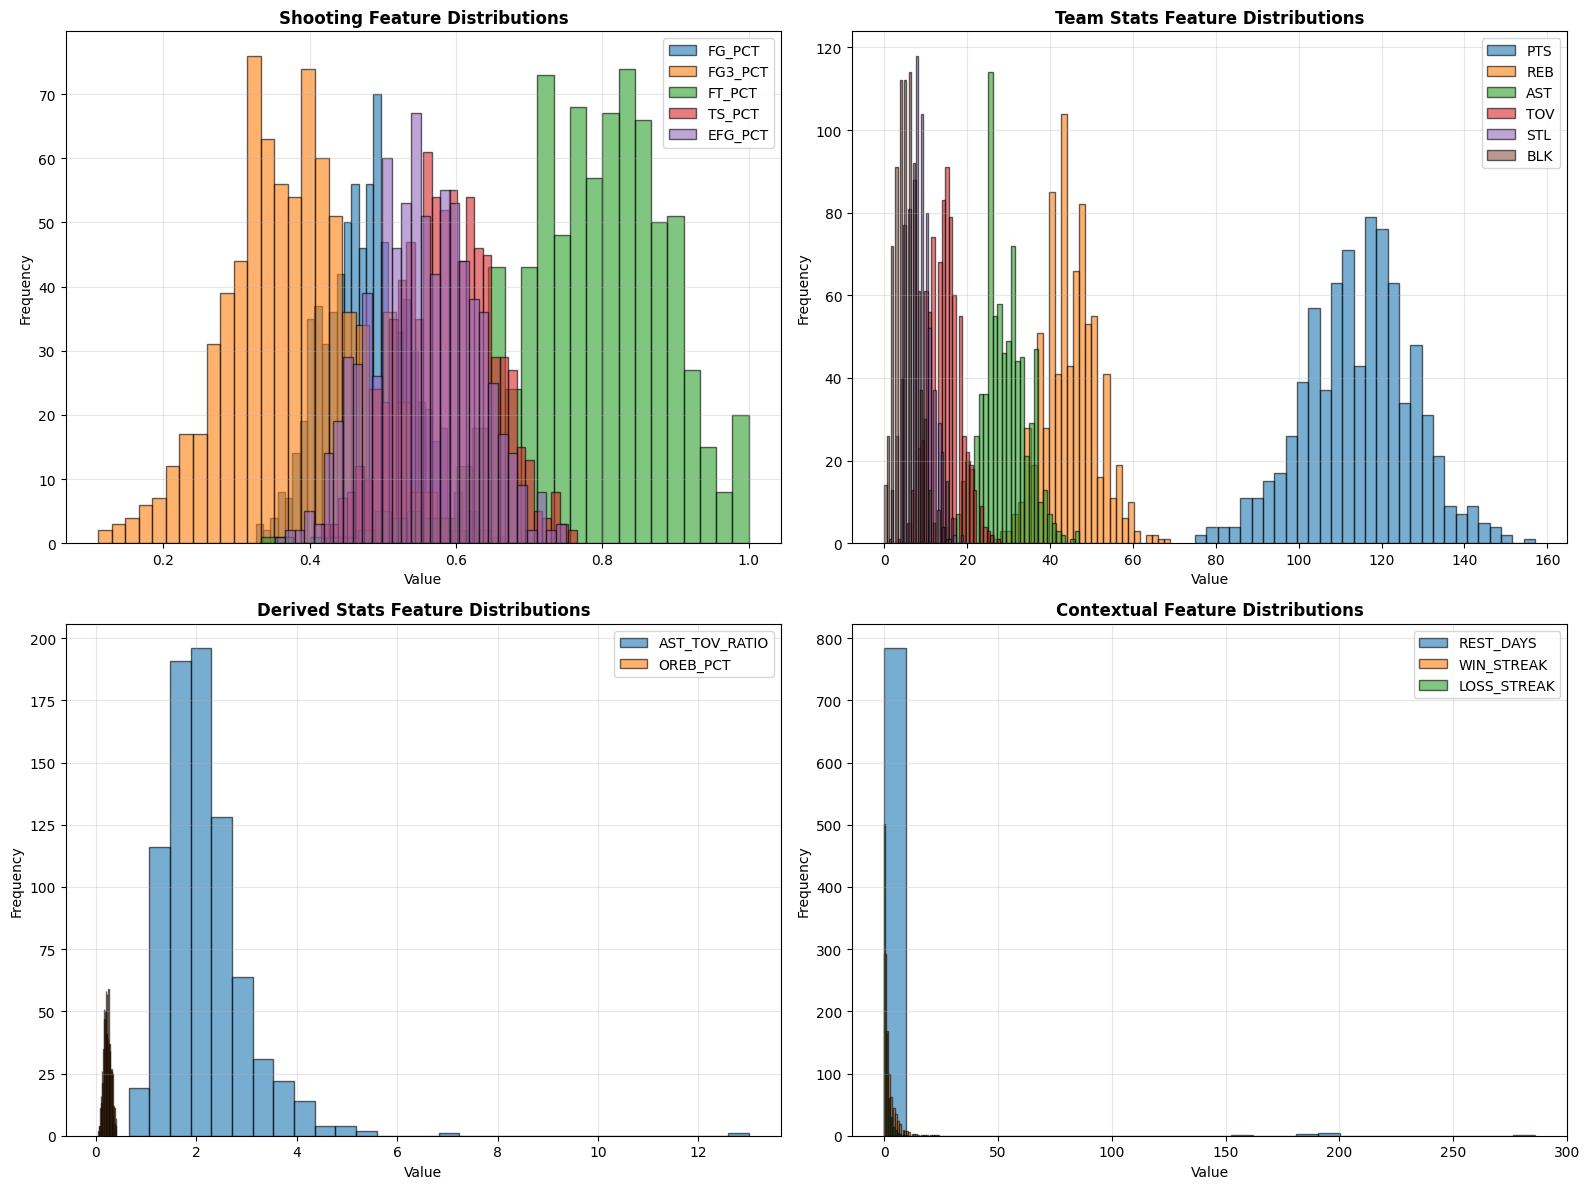

Feature Distribution Statistics


,FG_PCT,FG3_PCT,FT_PCT,TS_PCT,EFG_PCT,PTS,REB,AST,TOV,STL,BLK,AST_TOV_RATIO,OREB_PCT,REST_DAYS,WIN_STREAK,LOSS_STREAK
count,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000,793.000000
mean,0.477503,0.378097,0.784972,0.587071,0.554700,114.527112,44.901639,28.738966,14.387137,8.229508,5.414880,2.162186,0.221577,3.359395,2.204288,0.706179
std,0.056943,0.089512,0.102528,0.064091,0.069993,12.957568,6.460674,5.448214,3.771261,3.055511,2.728568,0.856975,0.071343,21.212923,3.243662,1.298085
min,0.326087,0.111111,0.333333,0.416177,0.353261,75.000000,25.000000,14.000000,3.000000,1.000000,0.000000,0.652174,0.043478,0.000000,0.000000,0.000000
25%,0.438202,0.321429,0.722222,0.541171,0.505747,106.000000,41.000000,25.000000,12.000000,6.000000,3.000000,1.625000,0.170213,1.000000,0.000000,0.000000
50%,0.477778,0.375000,0.789474,0.587406,0.552083,115.000000,45.000000,29.000000,14.000000,8.000000,5.000000,2.000000,0.217391,1.000000,1.000000,0.000000
75%,0.517241,0.439024,0.857143,0.631991,0.604396,123.000000,49.000000,32.000000,17.000000,10.000000,7.000000,2.500000,0.270833,1.000000,3.000000,1.000000
max,0.628205,0.666667,1.000000,0.764732,0.750000,157.000000,69.000000,47.000000,28.000000,19.000000,16.000000,13.000000,0.408163,286.000000,24.000000,10.000000



Outlier Detection (Values beyond 3 standard deviations)
FG3_PCT: 1 outliers (0.1%)
FT_PCT: 7 outliers (0.9%)
PTS: 2 outliers (0.3%)
REB: 6 outliers (0.8%)
AST: 3 outliers (0.4%)
TOV: 4 outliers (0.5%)
STL: 2 outliers (0.3%)
BLK: 6 outliers (0.8%)
AST_TOV_RATIO: 8 outliers (1.0%)
REST_DAYS: 9 outliers (1.1%)
WIN_STREAK: 17 outliers (2.1%)
LOSS_STREAK: 20 outliers (2.5%)


In [3]:
# Key feature distributions
feature_groups = {
    'Shooting': ['FG_PCT', 'FG3_PCT', 'FT_PCT', 'TS_PCT', 'EFG_PCT'],
    'Team Stats': ['PTS', 'REB', 'AST', 'TOV', 'STL', 'BLK'],
    'Derived Stats': ['AST_TOV_RATIO', 'OREB_PCT'],
    'Contextual': ['REST_DAYS', 'WIN_STREAK', 'LOSS_STREAK']
}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (group_name, features) in enumerate(feature_groups.items()):
    available_features = [f for f in features if f in df.columns]
    if available_features:
        for feat in available_features:
            data = df[feat].dropna()
            if len(data) > 0:
                axes[idx].hist(data, bins=30, alpha=0.6, label=feat, edgecolor='black')
        axes[idx].set_title(f'{group_name} Feature Distributions', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Value')
        axes[idx].set_ylabel('Frequency')
        axes[idx].legend()
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical summary of key features
print("Feature Distribution Statistics")
all_features = []
for features in feature_groups.values():
    all_features.extend([f for f in features if f in df.columns])

if all_features:
    dist_summary = df[all_features].describe()
    display(dist_summary)
    
    # Check for outliers and skewness
    print("\nOutlier Detection (Values beyond 3 standard deviations)")
    for feat in all_features:
        if df[feat].dtype in ['float64', 'int64']:
            mean = df[feat].mean()
            std = df[feat].std()
            outliers = df[(df[feat] < mean - 3*std) | (df[feat] > mean + 3*std)]
            if len(outliers) > 0:
                print(f"{feat}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")


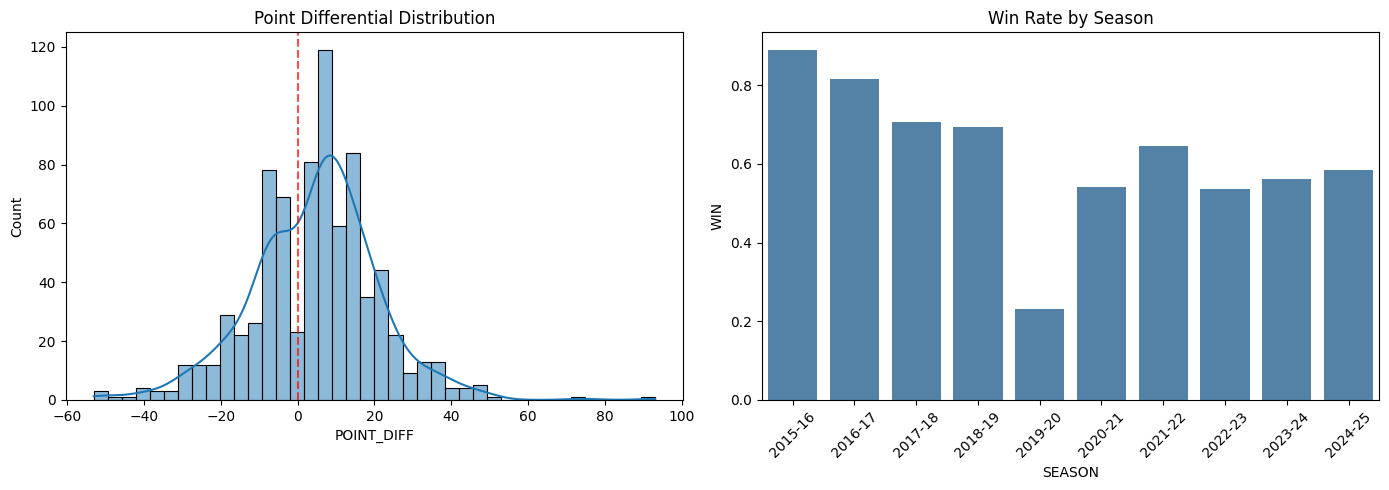

In [4]:
# Distribution of point differential and wins by season
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['POINT_DIFF'], bins=40, kde=True, ax=axes[0])
axes[0].set_title('Point Differential Distribution')
axes[0].axvline(0, color='red', linestyle='--', alpha=0.7)

if 'SEASON' in df:
    season_win = df.groupby('SEASON')['WIN'].mean().reset_index()
    sns.barplot(data=season_win, x='SEASON', y='WIN', ax=axes[1], color='steelblue')
    axes[1].set_title('Win Rate by Season')
    axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Rolling features vs target 
roll_cols = [c for c in df.columns if 'POINT_DIFF_ROLLING' in c]
if roll_cols:
    plt.figure(figsize=(12, 4))
    sns.boxplot(data=df.melt(value_vars=roll_cols, value_name='rolling_point_diff'), x='variable', y='rolling_point_diff')
    plt.xticks(rotation=45)
    plt.title('Rolling Point Differential Features')
    plt.show()

if 'all_features' in locals() and all_features:
    summary_features = all_features + ['SEASON'] if 'SEASON' in df.columns else all_features
    summary_df = df[summary_features].describe(include='all')
    display(summary_df.head())
else:
    key_features = ['WIN', 'POINT_DIFF', 'PTS', 'FG_PCT', 'REB', 'AST', 'SEASON']
    available_key = [f for f in key_features if f in df.columns]
    if available_key:
        summary_df = df[available_key].describe(include='all')
        display(summary_df.head())


,FG_PCT,FG3_PCT,FT_PCT,TS_PCT,EFG_PCT,PTS,REB,AST,TOV,STL,BLK,AST_TOV_RATIO,OREB_PCT,REST_DAYS,WIN_STREAK,LOSS_STREAK,SEASON
count,793.000000,793.000000,793.000000,793.000000,793.0000,793.000000,793.000000,793.000000,793.000000,793.000000,793.00000,793.000000,793.000000,793.000000,793.000000,793.000000,793
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-16
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82
mean,0.477503,0.378097,0.784972,0.587071,0.5547,114.527112,44.901639,28.738966,14.387137,8.229508,5.41488,2.162186,0.221577,3.359395,2.204288,0.706179,NaN


### Home/Away Wins & Losses Breakdown
Counts, win rates, and point differential distributions by venue.


Overall Venue Performance Summary


,venue,games,wins,losses,win_rate,avg_point_diff,std_point_diff
0,Away,395,224,171,0.567089,2.549367,16.947499
1,Home,398,276,122,0.693467,6.484925,15.778968


Win/Loss Breakdown by Venue


,venue,result,games,avg_point_diff,std_point_diff,min_point_diff,max_point_diff
0,Away,Loss,171,-11.257310,15.002486,-53.0,93.0
1,Away,Win,224,13.089286,8.838413,1.0,42.0
2,Home,Loss,122,-11.344262,10.748646,-40.0,49.0
3,Home,Win,276,14.365942,10.258485,1.0,50.0


/var/folders/lg/s7xypf815rg53lrjn3sdsvph0000gn/T/ipykernel_26875/150939918.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=venue_summary, x='venue', y='win_rate', palette='Blues', ax=axes[0,0])


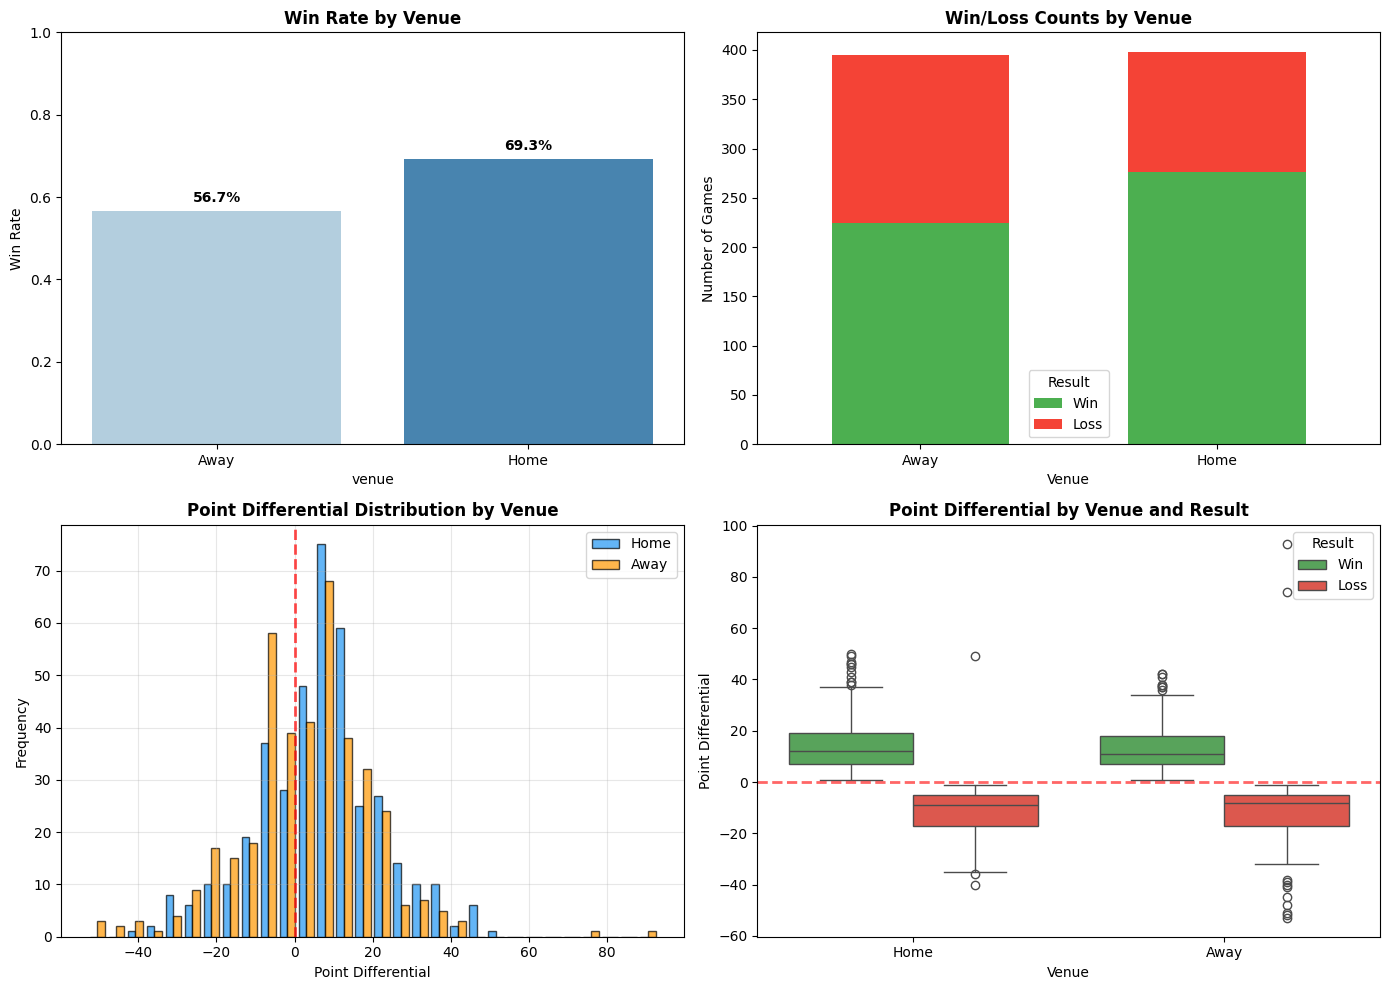


Statistical Comparison: Home vs Away

Home Wins:
  Count: 276
  Avg Point Diff: 14.37
  Std Point Diff: 10.26

Away Wins:
  Count: 224
  Avg Point Diff: 13.09
  Std Point Diff: 8.84

Home Losses:
  Count: 122
  Avg Point Diff: -11.34
  Std Point Diff: 10.75

Away Losses:
  Count: 171
  Avg Point Diff: -11.26
  Std Point Diff: 15.00

Home Advantage: 12.6% higher win rate at home


In [ ]:
if 'IS_HOME' in df.columns:
    venue_summary = df.groupby('IS_HOME').agg(
        games=('WIN', 'size'),
        wins=('WIN', 'sum'),
        losses=('WIN', lambda x: (x == 0).sum()),
        win_rate=('WIN', 'mean'),
        avg_point_diff=('POINT_DIFF', 'mean'),
        std_point_diff=('POINT_DIFF', 'std')
    ).reset_index()
    venue_summary['venue'] = venue_summary['IS_HOME'].map({1: 'Home', 0: 'Away'})
    print("Overall Venue Performance Summary")
    display(venue_summary[['venue', 'games', 'wins', 'losses', 'win_rate', 'avg_point_diff', 'std_point_diff']])
    
    # Win/Loss breakdown by venue
    print("Win/Loss Breakdown by Venue")
    venue_winloss = df.groupby(['IS_HOME', 'WL']).agg(
        games=('WIN', 'size'),
        avg_point_diff=('POINT_DIFF', 'mean'),
        std_point_diff=('POINT_DIFF', 'std'),
        min_point_diff=('POINT_DIFF', 'min'),
        max_point_diff=('POINT_DIFF', 'max')
    ).reset_index()
    venue_winloss['venue'] = venue_winloss['IS_HOME'].map({1: 'Home', 0: 'Away'})
    venue_winloss['result'] = venue_winloss['WL'].map({'W': 'Win', 'L': 'Loss'})
    display(venue_winloss[['venue', 'result', 'games', 'avg_point_diff', 'std_point_diff', 'min_point_diff', 'max_point_diff']])
    
    # Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Win Rate by Venue
    sns.barplot(data=venue_summary, x='venue', y='win_rate', palette='Blues', ax=axes[0,0])
    axes[0,0].set_title('Win Rate by Venue', fontsize=12, fontweight='bold')
    axes[0,0].set_ylim(0, 1)
    axes[0,0].set_ylabel('Win Rate')
    for i, v in enumerate(venue_summary['win_rate']):
        axes[0,0].text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')
    
    # 2. Win/Loss Counts by Venue (Stacked)
    pivot_counts = venue_winloss.pivot(index='venue', columns='result', values='games').fillna(0)
    pivot_counts[['Win', 'Loss']].plot(kind='bar', stacked=True, ax=axes[0,1], 
                                       color=['#4caf50', '#f44336'], width=0.6)
    axes[0,1].set_title('Win/Loss Counts by Venue', fontsize=12, fontweight='bold')
    axes[0,1].set_ylabel('Number of Games')
    axes[0,1].set_xlabel('Venue')
    axes[0,1].legend(title='Result')
    axes[0,1].tick_params(axis='x', rotation=0)
    
    # 3. Point Differential Distribution by Venue
    home_data = df[df['IS_HOME'] == 1]['POINT_DIFF']
    away_data = df[df['IS_HOME'] == 0]['POINT_DIFF']
    axes[1,0].hist([home_data, away_data], bins=30, alpha=0.7, label=['Home', 'Away'], 
                   color=['#2196F3', '#FF9800'], edgecolor='black')
    axes[1,0].axvline(0, color='red', linestyle='--', alpha=0.7, linewidth=2)
    axes[1,0].set_title('Point Differential Distribution by Venue', fontsize=12, fontweight='bold')
    axes[1,0].set_xlabel('Point Differential')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].legend()
    axes[1,0].grid(alpha=0.3)
    
    # 4. Point Differential by Venue and Result (Box Plot)
    df_plot = df.copy()
    df_plot['Venue'] = df_plot['IS_HOME'].map({1: 'Home', 0: 'Away'})
    df_plot['Result'] = df_plot['WL'].map({'W': 'Win', 'L': 'Loss'})
    sns.boxplot(data=df_plot, x='Venue', y='POINT_DIFF', hue='Result', ax=axes[1,1],
                palette={'Win': '#4caf50', 'Loss': '#f44336'})
    axes[1,1].axhline(0, color='red', linestyle='--', alpha=0.6, linewidth=2)
    axes[1,1].set_title('Point Differential by Venue and Result', fontsize=12, fontweight='bold')
    axes[1,1].set_ylabel('Point Differential')
    axes[1,1].legend(title='Result')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical comparison
    print("\nStatistical Comparison: Home vs Away")
    home_wins = df[(df['IS_HOME'] == 1) & (df['WIN'] == 1)]
    away_wins = df[(df['IS_HOME'] == 0) & (df['WIN'] == 1)]
    home_losses = df[(df['IS_HOME'] == 1) & (df['WIN'] == 0)]
    away_losses = df[(df['IS_HOME'] == 0) & (df['WIN'] == 0)]
    
    print(f"\nHome Wins:")
    print(f"  Count: {len(home_wins)}")
    print(f"  Avg Point Diff: {home_wins['POINT_DIFF'].mean():.2f}")
    print(f"  Std Point Diff: {home_wins['POINT_DIFF'].std():.2f}")
    
    print(f"\nAway Wins:")
    print(f"  Count: {len(away_wins)}")
    print(f"  Avg Point Diff: {away_wins['POINT_DIFF'].mean():.2f}")
    print(f"  Std Point Diff: {away_wins['POINT_DIFF'].std():.2f}")
    
    print(f"\nHome Losses:")
    print(f"  Count: {len(home_losses)}")
    print(f"  Avg Point Diff: {home_losses['POINT_DIFF'].mean():.2f}")
    print(f"  Std Point Diff: {home_losses['POINT_DIFF'].std():.2f}")
    
    print(f"\nAway Losses:")
    print(f"  Count: {len(away_losses)}")
    print(f"  Avg Point Diff: {away_losses['POINT_DIFF'].mean():.2f}")
    print(f"  Std Point Diff: {away_losses['POINT_DIFF'].std():.2f}")
    
    # Win rate difference
    home_win_rate = venue_summary[venue_summary['IS_HOME'] == 1]['win_rate'].values[0]
    away_win_rate = venue_summary[venue_summary['IS_HOME'] == 0]['win_rate'].values[0]
    print(f"\nHome Advantage: {home_win_rate - away_win_rate:.1%} higher win rate at home")
    
else:
    print('IS_HOME not available in dataset')


### Venue Performance by Season
Analyze how home/away performance varies across different seasons.


Win Rate by Season and Venue


venue,Away,Home
SEASON,,
2015-16,0.829268,0.951220
2016-17,0.756098,0.878049
2017-18,0.707317,0.707317
2018-19,0.658537,0.731707
2019-20,0.225806,0.235294
2020-21,0.388889,0.694444
2021-22,0.536585,0.756098
2022-23,0.268293,0.804878
2023-24,0.609756,0.512195



Average Point Differential by Season and Venue


venue,Away,Home
SEASON,,
2015-16,7.121951,14.390244
2016-17,7.317073,15.951220
2017-18,4.390244,7.560976
2018-19,6.292683,6.634146
2019-20,-8.709677,-8.705882
2020-21,-3.111111,5.222222
2021-22,1.195122,9.878049
2022-23,-5.341463,6.609756
2023-24,6.463415,0.756098


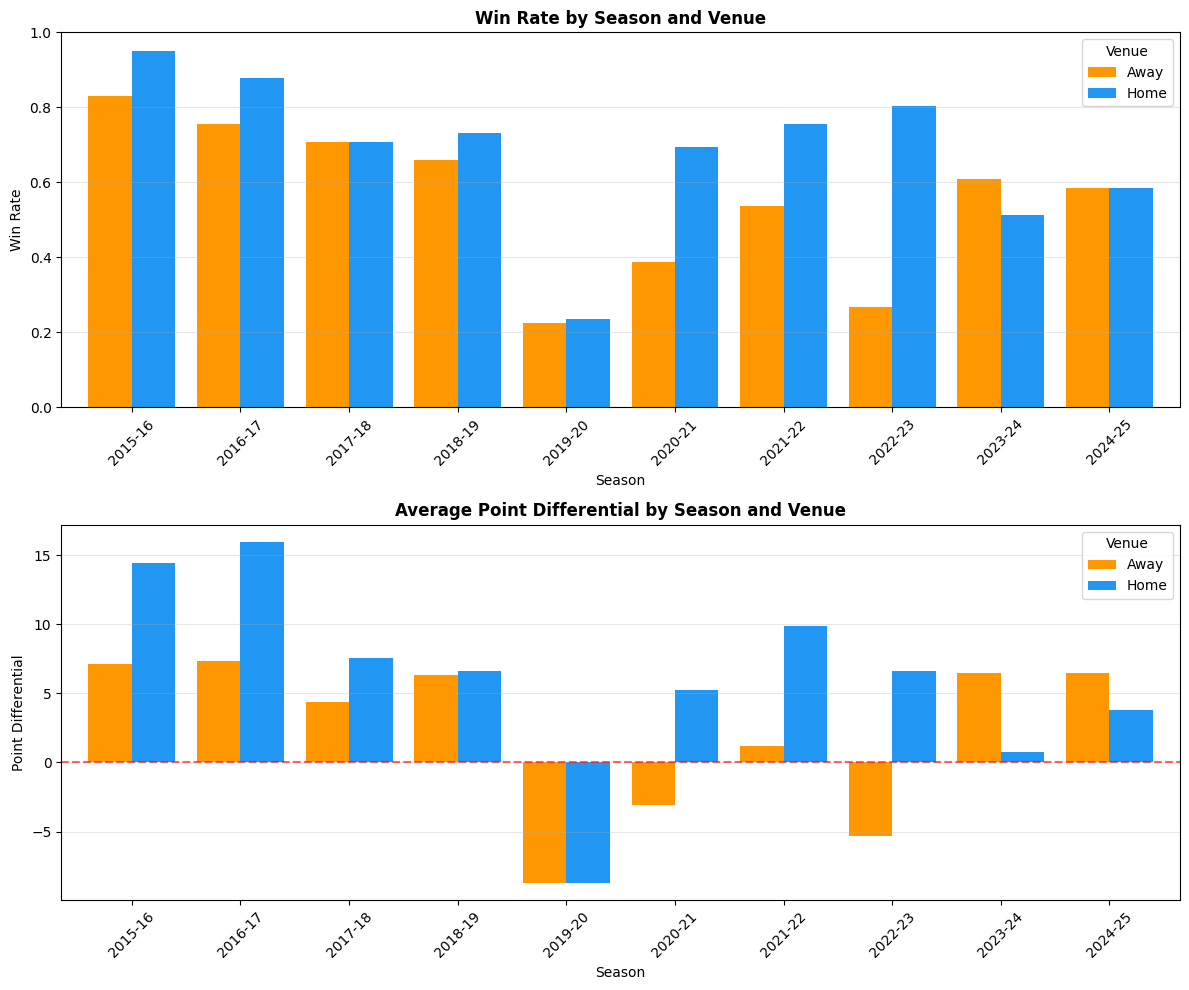


Home Advantage by Season (Home Win Rate - Away Win Rate)


,SEASON,home_advantage
1,2015-16,0.121951
3,2016-17,0.121951
5,2017-18,0.000000
7,2018-19,0.073171
9,2019-20,0.009488
11,2020-21,0.305556
13,2021-22,0.219512
15,2022-23,0.536585
17,2023-24,-0.097561
19,2024-25,0.000000


In [ ]:
# Season-by-season venue breakdown
if 'IS_HOME' in df.columns and 'SEASON' in df.columns:
    season_venue = df.groupby(['SEASON', 'IS_HOME']).agg(
        games=('WIN', 'size'),
        wins=('WIN', 'sum'),
        win_rate=('WIN', 'mean'),
        avg_point_diff=('POINT_DIFF', 'mean')
    ).reset_index()
    season_venue['venue'] = season_venue['IS_HOME'].map({1: 'Home', 0: 'Away'})
    
    win_rate_pivot = season_venue.pivot(index='SEASON', columns='venue', values='win_rate')
    point_diff_pivot = season_venue.pivot(index='SEASON', columns='venue', values='avg_point_diff')
    
    print("Win Rate by Season and Venue")
    display(win_rate_pivot)
    
    print("\nAverage Point Differential by Season and Venue")
    display(point_diff_pivot)
    
    # Visualizations
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    
    # Win rate by season and venue
    win_rate_pivot.plot(kind='bar', ax=axes[0], color=['#FF9800', '#2196F3'], width=0.8)
    axes[0].set_title('Win Rate by Season and Venue', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Win Rate')
    axes[0].set_xlabel('Season')
    axes[0].legend(title='Venue')
    axes[0].set_ylim(0, 1)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(alpha=0.3, axis='y')
    
    # Point differential by season and venue
    point_diff_pivot.plot(kind='bar', ax=axes[1], color=['#FF9800', '#2196F3'], width=0.8)
    axes[1].set_title('Average Point Differential by Season and Venue', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Point Differential')
    axes[1].set_xlabel('Season')
    axes[1].legend(title='Venue')
    axes[1].axhline(0, color='red', linestyle='--', alpha=0.6)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Home advantage by season
    season_venue['home_advantage'] = season_venue.groupby('SEASON')['win_rate'].transform(
        lambda x: x[season_venue['IS_HOME'] == 1].values[0] - x[season_venue['IS_HOME'] == 0].values[0] 
        if len(x[season_venue['IS_HOME'] == 1]) > 0 and len(x[season_venue['IS_HOME'] == 0]) > 0 else 0
    )
    home_adv_by_season = season_venue[season_venue['IS_HOME'] == 1][['SEASON', 'home_advantage']].drop_duplicates()
    print("\nHome Advantage by Season (Home Win Rate - Away Win Rate)")
    display(home_adv_by_season.sort_values('SEASON'))
    
else:
    print('IS_HOME or SEASON not available for season-by-season analysis')


## Back-to-Back Impact
Compare back-to-back games vs. games with rest.


,type,games,wins,win_rate,avg_point_diff,avg_rest_days
0,Not B2B,645,407,0.631008,4.886822,4.130233
1,Back-to-Back,148,93,0.628378,2.945946,0.000000


/var/folders/lg/s7xypf815rg53lrjn3sdsvph0000gn/T/ipykernel_26875/2807464403.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=b2b_summary, x='type', y='win_rate', palette='Oranges')


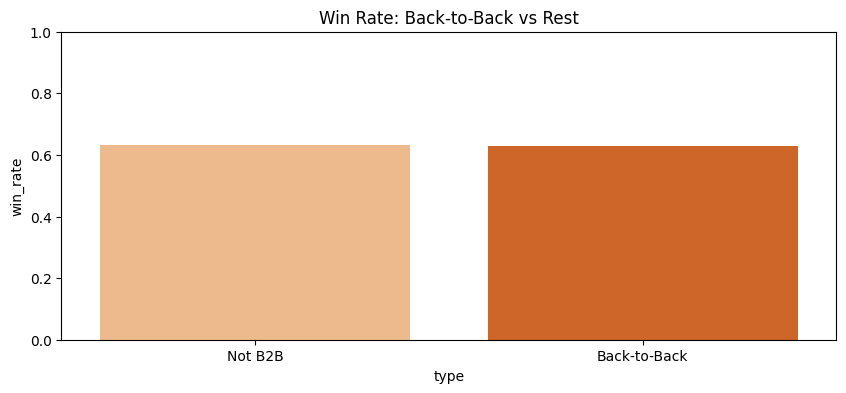

In [ ]:
if 'IS_BACK_TO_BACK' in df.columns:
    b2b_summary = df.groupby('IS_BACK_TO_BACK').agg(
        games=('WIN', 'size'),
        wins=('WIN', 'sum'),
        win_rate=('WIN', 'mean'),
        avg_point_diff=('POINT_DIFF', 'mean'),
        avg_rest_days=('REST_DAYS', 'mean') if 'REST_DAYS' in df.columns else ('WIN','size')
    ).reset_index()
    b2b_summary['type'] = b2b_summary['IS_BACK_TO_BACK'].map({1: 'Back-to-Back', 0: 'Not B2B'})
    display(b2b_summary[['type', 'games', 'wins', 'win_rate', 'avg_point_diff'] + ([ 'avg_rest_days'] if 'REST_DAYS' in df.columns else [])])
    
    plt.figure(figsize=(10,4))
    sns.barplot(data=b2b_summary, x='type', y='win_rate', palette='Oranges')
    plt.title('Win Rate: Back-to-Back vs Rest')
    plt.ylim(0,1)
    plt.show()
else:
    print('IS_BACK_TO_BACK not available in dataset')


## Opponent Breakdown
Win rate and point differential by opponent.


,Opponent,games,wins,win_rate,avg_point_diff
4,CHI,20,17,0.850000,16.500000
28,WAS,20,15,0.750000,6.750000
17,NOP,35,26,0.742857,5.428571
5,CLE,19,14,0.736842,9.263158
18,NYK,19,14,0.736842,7.684211
23,POR,35,25,0.714286,7.657143
9,HOU,35,25,0.714286,5.028571
3,CHA,20,14,0.700000,10.000000
21,PHI,20,14,0.700000,5.700000
20,ORL,20,14,0.700000,7.550000


,Opponent,games,wins,win_rate,avg_point_diff
15,MIL,19,11,0.578947,0.157895
12,LAL,38,22,0.578947,2.184211
25,SAS,33,19,0.575758,8.030303
16,MIN,35,20,0.571429,3.257143
11,LAC,38,21,0.552632,2.815789
14,MIA,20,11,0.550000,5.000000
6,DAL,36,19,0.527778,0.861111
10,IND,19,9,0.473684,4.052632
7,DEN,34,15,0.441176,5.235294
2,BOS,20,8,0.400000,-6.900000


/var/folders/lg/s7xypf815rg53lrjn3sdsvph0000gn/T/ipykernel_26875/3488788202.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_opp, x='OPP_CODE', y='win_rate', palette='Greens')


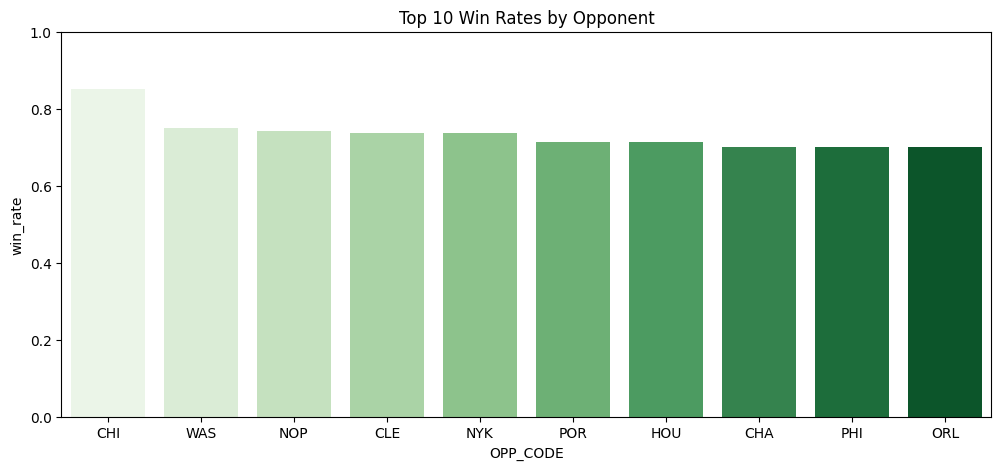

In [ ]:
# Extract opponent code from MATCHUP (assumes format like 'GSW vs. LAL' or 'GSW @ LAL')
if 'MATCHUP' in df.columns:
    df['OPP_CODE'] = df['MATCHUP'].str.extract(r'GSW [@|vs\.]+ ([A-Z]{2,3})')[0]
    opp_summary = df.groupby('OPP_CODE').agg(
        games=('WIN', 'size'),
        wins=('WIN', 'sum'),
        win_rate=('WIN', 'mean'),
        avg_point_diff=('POINT_DIFF', 'mean')
    ).reset_index().sort_values('win_rate', ascending=False)
    
    display(opp_summary.head(10).rename(columns={'OPP_CODE':'Opponent'}))
    display(opp_summary.tail(10).rename(columns={'OPP_CODE':'Opponent'}))
    
    plt.figure(figsize=(12,5))
    top_opp = opp_summary.head(10)
    sns.barplot(data=top_opp, x='OPP_CODE', y='win_rate', palette='Greens')
    plt.title('Top 10 Win Rates by Opponent')
    plt.ylim(0,1)
    plt.show()
else:
    print('MATCHUP column not available for opponent parsing')
